Import the data

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

In [3]:
fetch_housing_data()

Pandas reading your csv file

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [5]:
housing = load_housing_data();
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts() # valuable with analyzing text fields

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe() # analyses numerical only

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


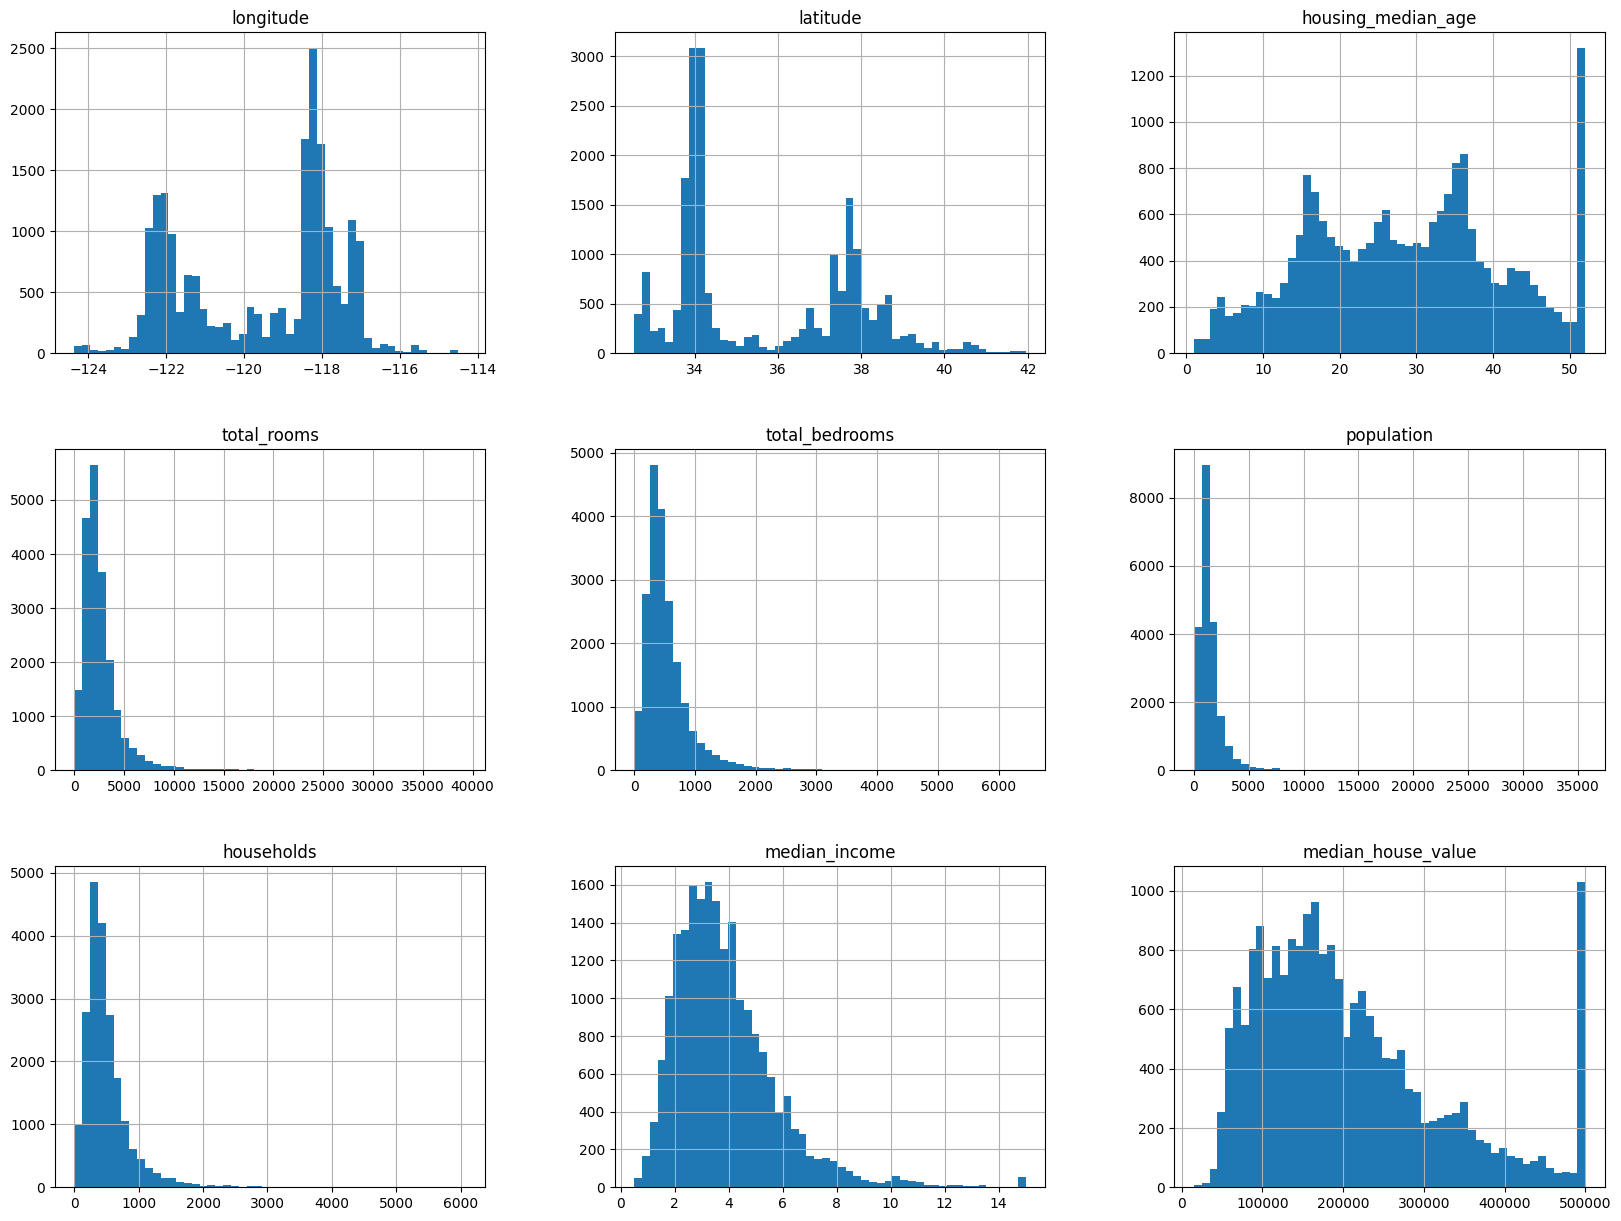

In [9]:
#%matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()


In [10]:
import numpy as np

def splitTestData(data, test_size):
    shuffledIndices = np.random.permutation(len(data))
    testSize = int( len(data) * test_size )
    trainIndices = shuffledIndices[testSize:]
    testIndices = shuffledIndices[:testSize]
    return data.iloc[trainIndices],data.iloc[testIndices]

In [11]:
trainSet,testSet = splitTestData(housing,0.2)

print(len(housing),len(trainSet),len(testSet))

20640 16512 4128


In [12]:
from zlib import crc32

def testSetCheck(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32 # checks if the hash of the identifier is less than 20% of maximum

In [13]:
def split_train_test_by_id(data, test_ratio, id_column):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: testSetCheck(id_, test_ratio))
 return data.loc[~in_test_set], data.loc[in_test_set]


In [14]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [16]:
housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [26]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3781,-118.39,34.16,46.0,1582.0,279.0,603.0,283.0,5.1169,414300.0,<1H OCEAN
14158,-117.08,32.76,27.0,1221.0,254.0,606.0,259.0,3.0833,155400.0,NEAR OCEAN
14041,-117.14,32.75,27.0,1551.0,464.0,880.0,400.0,2.4167,131300.0,NEAR OCEAN
17845,-121.87,37.42,19.0,12128.0,2112.0,6810.0,2040.0,6.4419,264500.0,<1H OCEAN
19320,-123.01,38.48,37.0,1179.0,282.0,354.0,176.0,1.3712,118300.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
1860,-124.16,41.92,19.0,1668.0,324.0,841.0,283.0,2.1336,75000.0,NEAR OCEAN
12382,-116.38,33.73,10.0,11836.0,2405.0,3811.0,1570.0,4.0079,134500.0,INLAND
4158,-118.19,34.11,40.0,1266.0,348.0,1032.0,315.0,2.1667,150000.0,<1H OCEAN
5589,-118.30,33.79,9.0,2782.0,884.0,1790.0,748.0,2.9154,203300.0,<1H OCEAN


<AxesSubplot:>

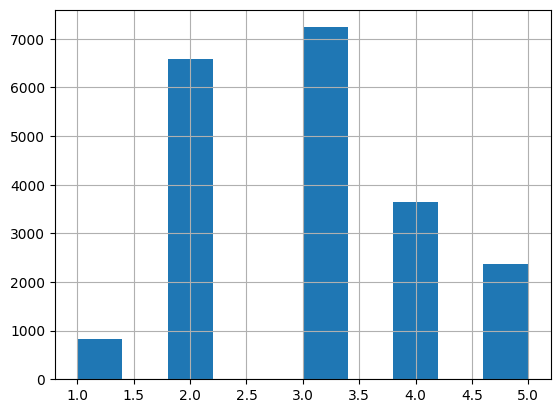

In [18]:
housing["income_cat"].hist()

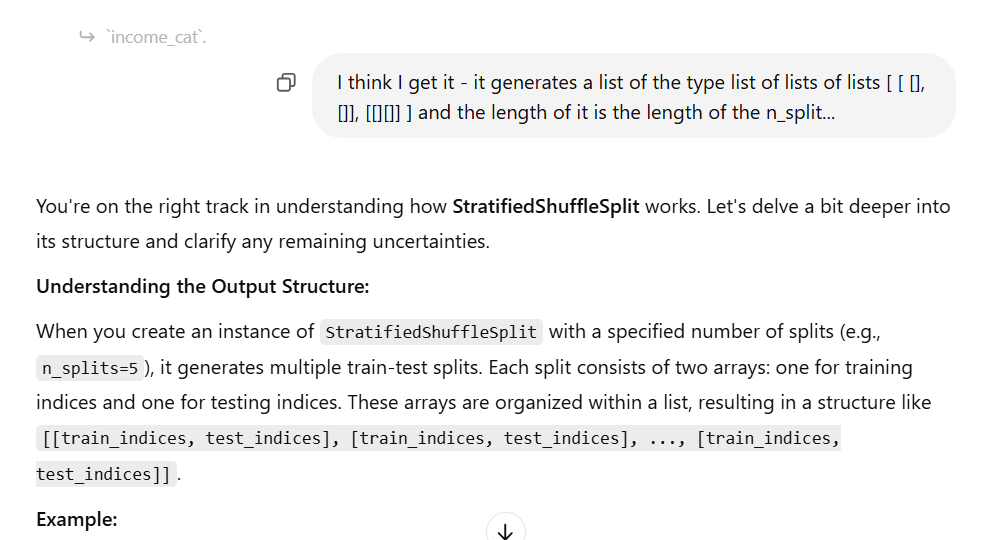

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=12, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]
 
split.split(housing, housing["income_cat"])


<generator object BaseShuffleSplit.split at 0x0000019BF5262C00>

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [21]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set) # this cross validatoin approach matches probabilities

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [22]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)
 
strat_test_set.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4975,-118.28,34.00,44.0,2636.0,725.0,2182.0,651.0,1.4320,124000.0,<1H OCEAN
8954,-118.39,34.02,38.0,2447.0,636.0,1312.0,574.0,3.5909,279400.0,<1H OCEAN
882,-121.96,37.55,4.0,3746.0,993.0,1606.0,838.0,4.1387,162500.0,<1H OCEAN
12480,-121.49,38.58,52.0,1000.0,324.0,456.0,250.0,1.4375,168800.0,INLAND
7048,-118.05,33.94,34.0,495.0,120.0,527.0,130.0,1.9453,149000.0,<1H OCEAN
9704,-121.64,36.66,24.0,3174.0,506.0,1466.0,535.0,5.2285,248100.0,<1H OCEAN
8770,-118.34,33.79,36.0,716.0,123.0,388.0,124.0,5.0254,350000.0,<1H OCEAN
5436,-118.43,34.01,27.0,3133.0,1021.0,2242.0,1002.0,2.6970,412500.0,<1H OCEAN
10515,-117.70,33.53,5.0,6698.0,1254.0,2834.0,1139.0,5.9088,288500.0,<1H OCEAN
11271,-117.99,33.79,21.0,2695.0,707.0,1888.0,683.0,3.2857,213300.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

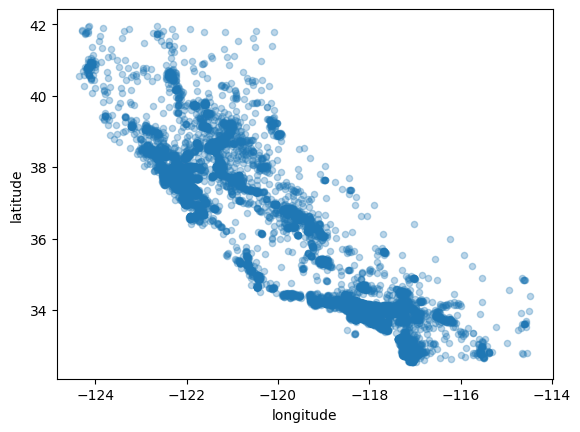

In [23]:
housing = strat_train_set.copy()

housing.plot(kind = "scatter", x="longitude",y="latitude",alpha=0.3)

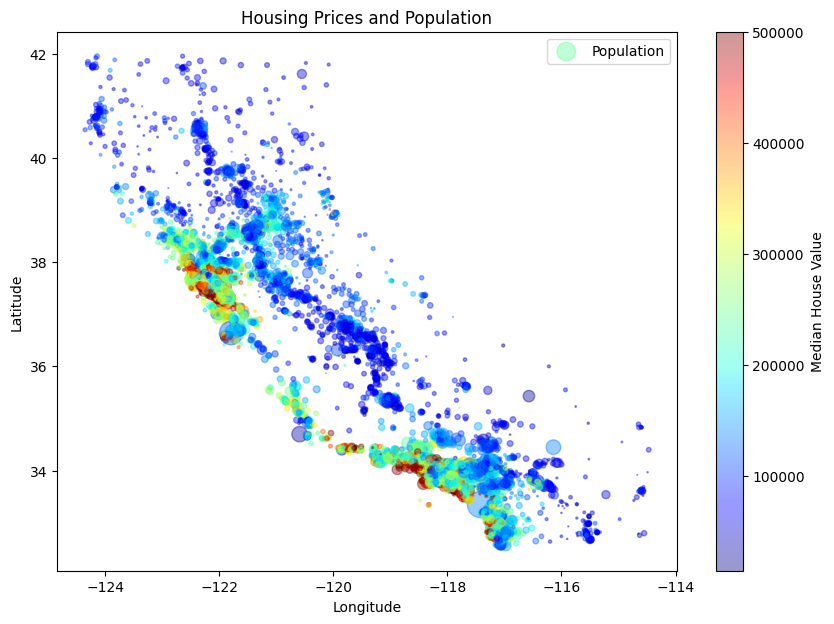

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x = housing["longitude"]
y = housing["latitude"]

color = housing["median_house_value"]
radius = housing["population"]/100

plt.figure(figsize=(10,7))
scatter = plt.scatter(x,y,alpha=0.4,s=radius, c = color, cmap=plt.get_cmap("jet"))

plt.colorbar(scatter, label='Median House Value')

# Adding labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Prices and Population')
plt.legend(['Population'])

plt.show()
